In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv("ENB2012_data.csv")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FBCD05400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027FBD43C080>]], dtype=object)

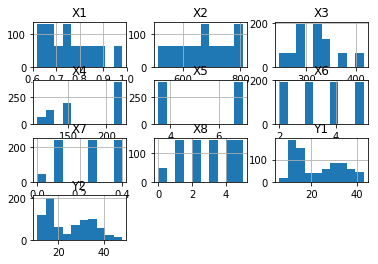

In [6]:
df.hist()

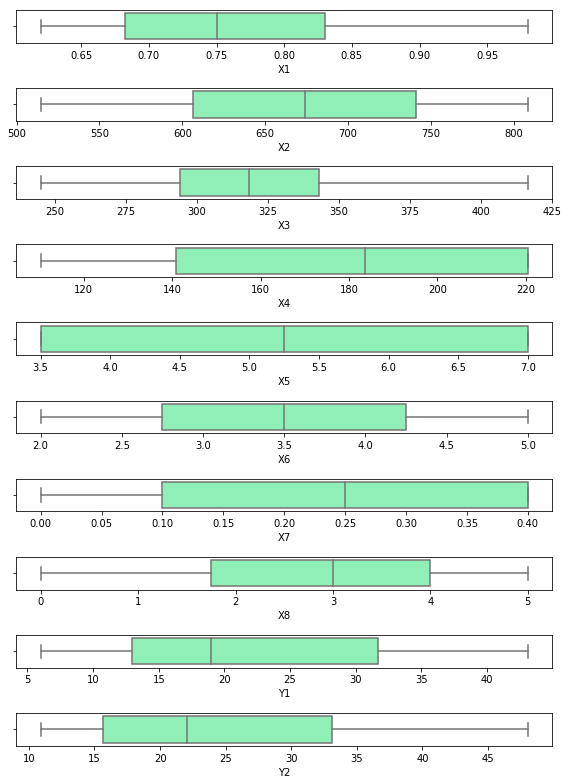

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig,axes=plt.subplots(10,1,figsize=(8,11),sharex=False)
i=0
for col in df.columns :
    if col!='Date' :
        sns.boxplot(data=df,palette='rainbow',orient='h',y=col,ax=axes[i])
        i=i+1
plt.tight_layout()

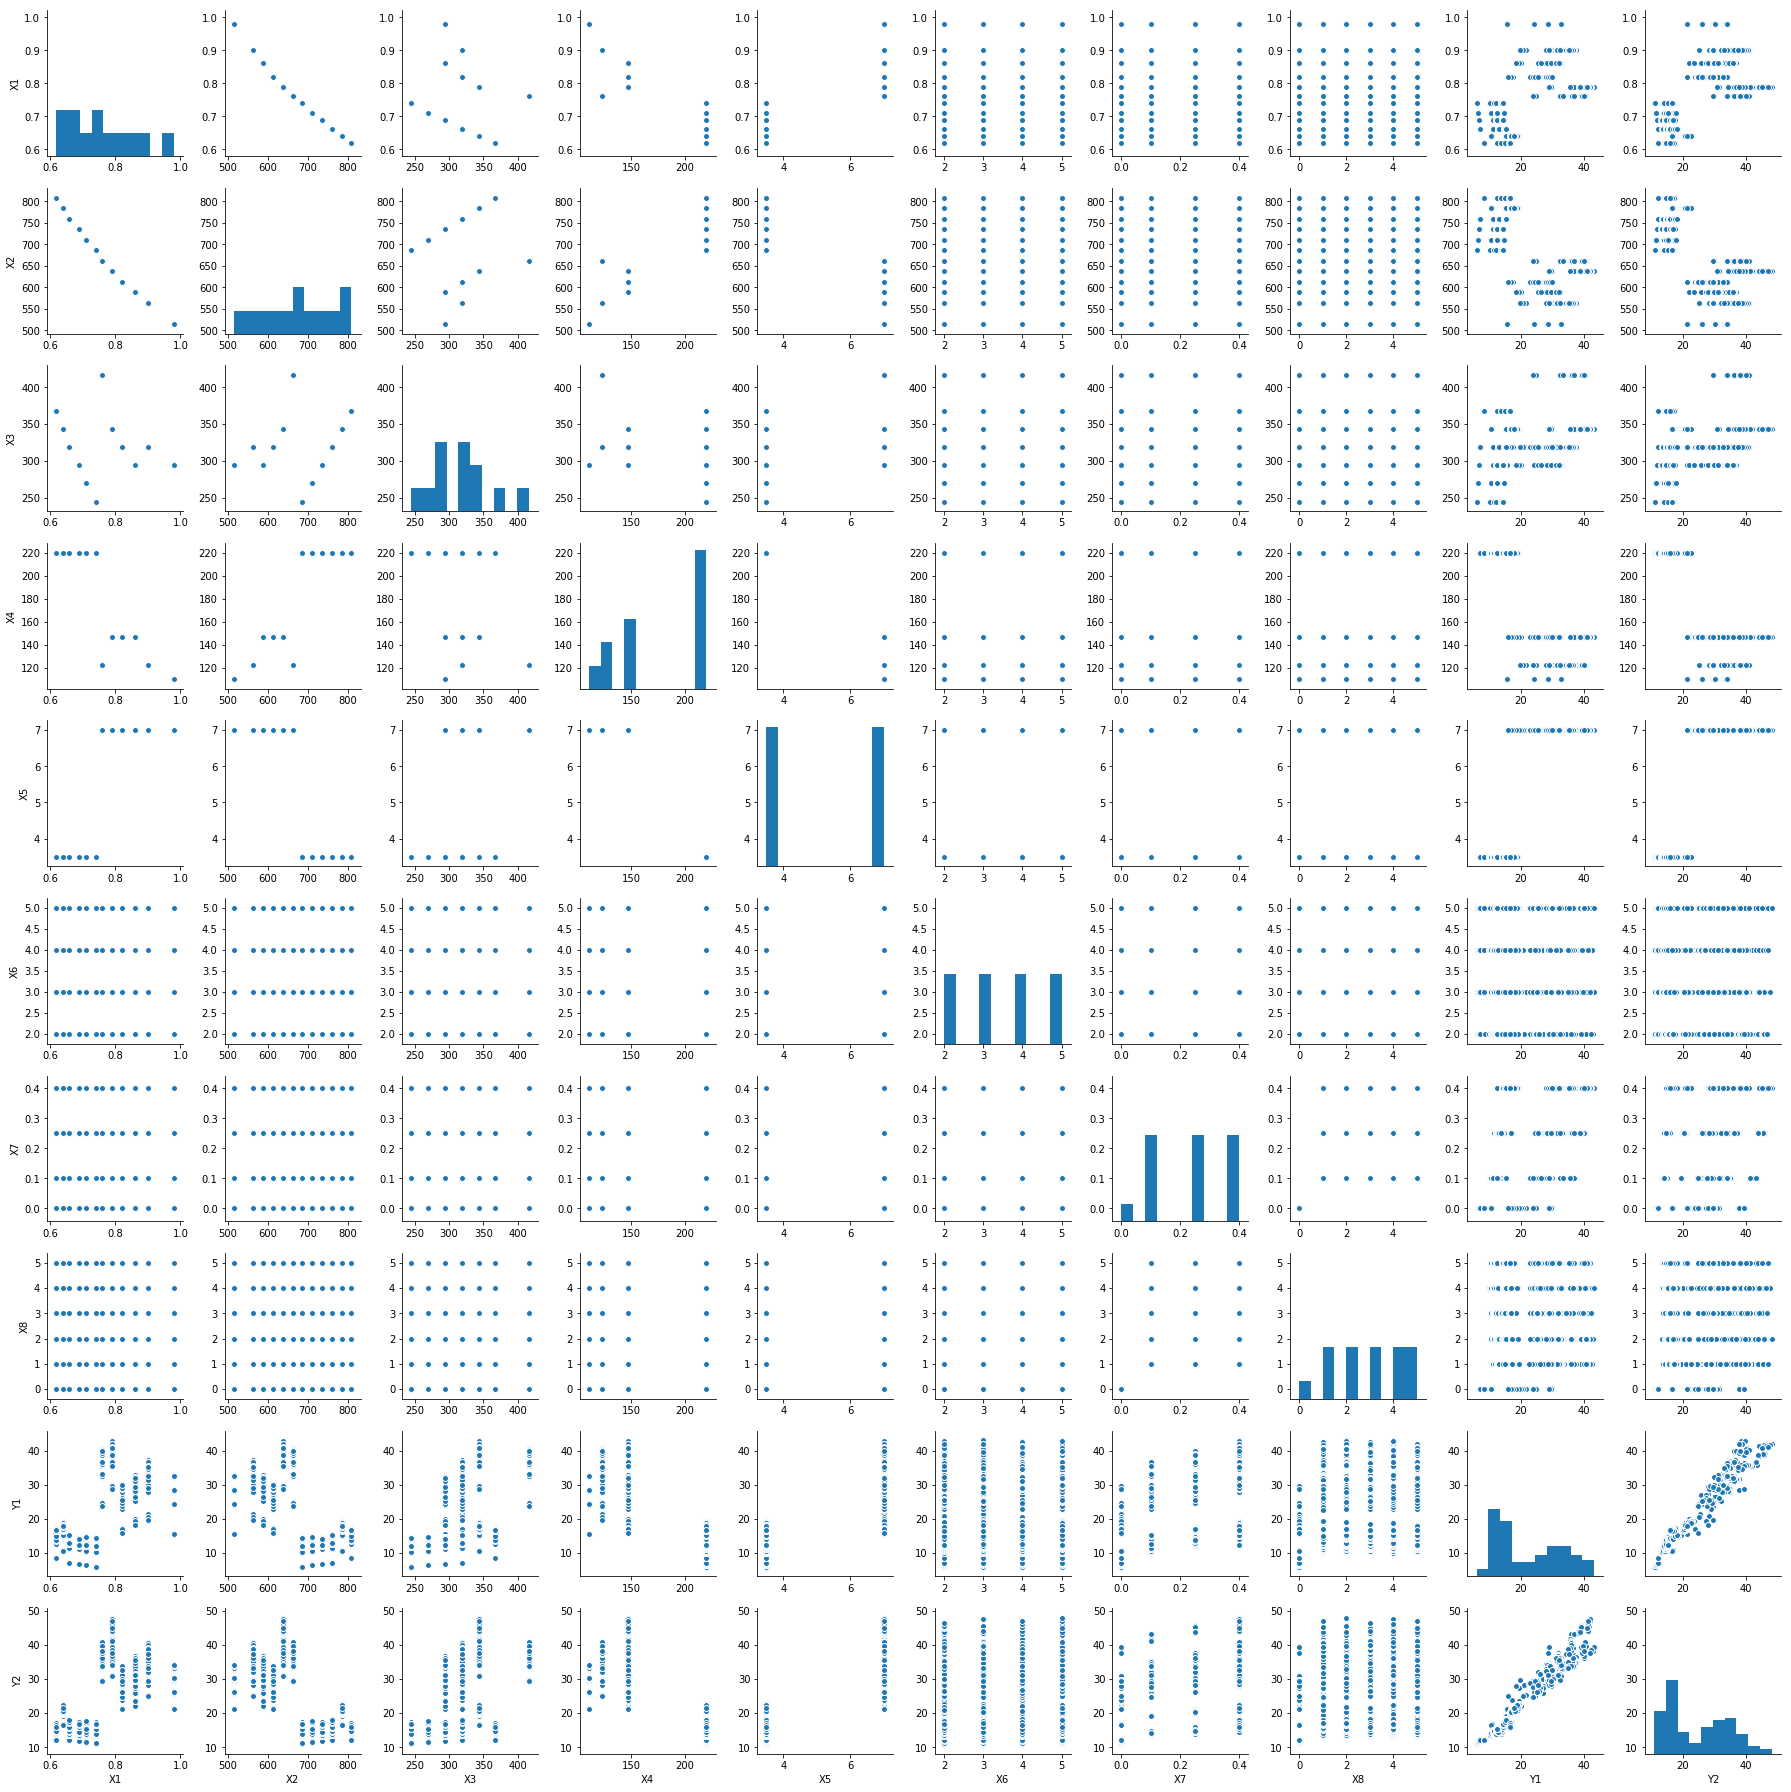

In [8]:
sns.pairplot(data=df)

In [9]:
X=df.drop(['Y1','Y2'],axis=1)
y1=df['Y1']
y2=df['Y2']

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
scores =cross_val_score(LinearRegression(),X,y1,cv=5)

In [11]:
scores.mean()

0.88938826217758093

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y1_train,y1_test=train_test_split(X,y1,test_size=0.33,random_state=42)

In [13]:
scores =cross_val_score(LinearRegression(),X_train,y1_train,cv=5)

In [14]:
scores.mean()

0.91113382650282959

In [15]:
lm=LinearRegression()
lm.fit(X_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print(lm.score(X_train,y1_train))
print(lm.score(X_test,y1_test))

0.915620882677
0.914563134704


In [17]:
#linear regression with scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
pipe=Pipeline([('sc',Normalizer()),('lm',LinearRegression())])
scores =cross_val_score(pipe,X,y1,cv=5)
scores.mean()

0.89581028582901434

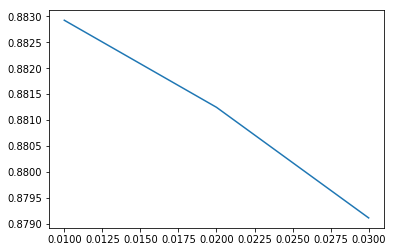

In [18]:
#lasso
from sklearn.linear_model import Lasso
alphas=[0.01,0.02,0.03]
scores=[]
for alpha in alphas :
    scores.append(cross_val_score(Lasso(alpha=alpha),X,y1,cv=5).mean())
plt.plot(alphas,scores)

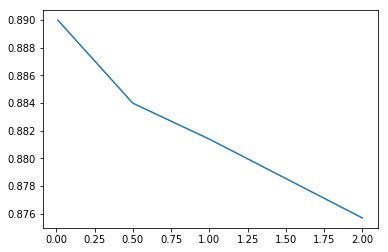

In [19]:
#Ridge
from sklearn.linear_model import Ridge
alphas=[0.01,0.5,1,2]
scores=[]
for alpha in alphas :
    scores.append(cross_val_score(Ridge(alpha=alpha),X,y1,cv=5).mean())
plt.plot(alphas,scores)

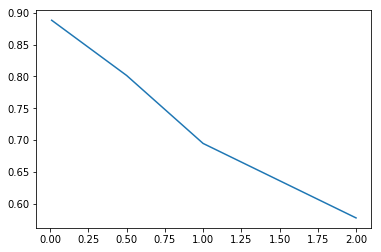

In [20]:
#lasso with scaling

alphas=[0.01,0.5,1,2]

scores=[]
for alpha in alphas :
    pipe=Pipeline([('sc',MinMaxScaler()),('lm',Lasso(alpha=alpha))])
    scores.append(cross_val_score(pipe,X,y1,cv=5).mean())
plt.plot(alphas,scores)

In [21]:
scores

[0.8882219642286312,
 0.80153682613270638,
 0.69484644242019011,
 0.57792508788079344]

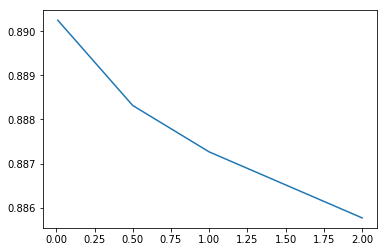

In [22]:
#Ridge with scaling

alphas=[0.01,0.5,1,2]

scores=[]
for alpha in alphas :
    pipe=Pipeline([('sc',MinMaxScaler()),('lm',Ridge(alpha=alpha))])
    scores.append(cross_val_score(pipe,X,y1,cv=5).mean())
plt.plot(alphas,scores)

In [23]:
scores

[0.89025126776262165,
 0.88831741584947321,
 0.88726478943463127,
 0.88576755555916442]

### Linear Regression scaled with Normalizer has resulted in score of 0.895

### KNN Regression

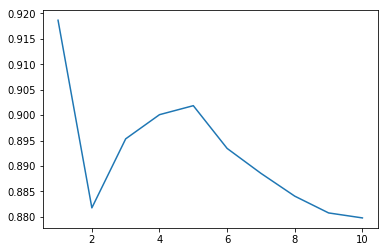

In [24]:
from sklearn.neighbors import KNeighborsRegressor
alphas=[1,2,3,4,5,6,7,8,9,10]

scores=[]
for alpha in alphas :
    pipe=Pipeline([('sc',MinMaxScaler()),('lm',KNeighborsRegressor(n_neighbors=alpha))])
    scores.append(cross_val_score(pipe,X,y1,cv=5).mean())
plt.plot(alphas,scores)

In [25]:
scores

[0.91866476569331179,
 0.88176554224651738,
 0.89533958496143273,
 0.90009486888856305,
 0.90186366334529777,
 0.89345563334763545,
 0.88855491492884175,
 0.88406819224775801,
 0.88077161614790178,
 0.87979000343052793]

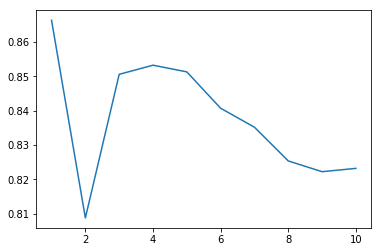

In [26]:

alphas=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for alpha in alphas :
    scores.append(cross_val_score(KNeighborsRegressor(n_neighbors=alpha),X,y1,cv=5).mean())
plt.plot(alphas,scores)

### Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
pipe=Pipeline([('sc',MinMaxScaler()),('poly',PolynomialFeatures(degree=2)),('lm',LinearRegression())])
scores =cross_val_score(pipe,X,y1,cv=5)
scores.mean()

0.96172890785605403

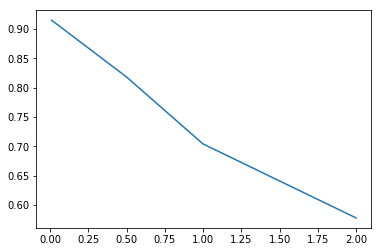

In [28]:
alphas=[0.01,0.5,1,2]

scores=[]
for alpha in alphas :
    pipe=Pipeline([('sc',MinMaxScaler()),('poly',PolynomialFeatures(degree=2)),('lm',Lasso(alpha=alpha))])
    scores.append(cross_val_score(pipe,X,y1,cv=5).mean())
plt.plot(alphas,scores)

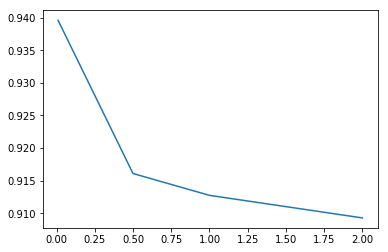

In [29]:
alphas=[0.01,0.5,1,2]

scores=[]
for alpha in alphas :
    pipe=Pipeline([('sc',MinMaxScaler()),('poly',PolynomialFeatures(degree=2)),('lm',Ridge(alpha=alpha))])
    scores.append(cross_val_score(pipe,X,y1,cv=5).mean())
plt.plot(alphas,scores)

### Polynomial regression with degree 2 is giving an accuracy of 0.96

### Support Vector Machines

In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
pipe=Pipeline([('sc',MinMaxScaler()),('svr',SVR())])
param_grid={'svr__C' : [10,50,70],'svr__epsilon' : [0.1,0.5,1]}
grid=GridSearchCV(pipe,param_grid,cv=5,return_train_score=True)
grid.fit(X,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('sc', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svr__C': [10, 50, 70], 'svr__epsilon': [0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [31]:
grid.best_score_

0.91524180528053245

In [32]:
grid.best_params_

{'svr__C': 50, 'svr__epsilon': 1}

In [33]:
results=pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_svr__C,param_svr__epsilon,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.036889,0.000808,0.907837,0.927094,10,0.1,"{'svr__C': 10, 'svr__epsilon': 0.1}",9,0.838027,0.930092,...,0.928628,0.927938,0.936207,0.924253,0.933115,0.923072,0.009147,0.000990,0.036813,0.002935
1,0.032690,0.003542,0.908943,0.928980,10,0.5,"{'svr__C': 10, 'svr__epsilon': 0.5}",8,0.836084,0.931453,...,0.928792,0.929896,0.937865,0.926261,0.936710,0.925281,0.000807,0.006114,0.038287,0.002728
2,0.031177,0.000608,0.911709,0.929967,10,1,"{'svr__C': 10, 'svr__epsilon': 1}",5,0.846957,0.932971,...,0.928721,0.930750,0.935537,0.926996,0.941522,0.926316,0.001584,0.000806,0.034571,0.002822
3,0.055408,0.003189,0.910874,0.933558,50,0.1,"{'svr__C': 50, 'svr__epsilon': 0.1}",7,0.847793,0.934655,...,0.928240,0.936151,0.939956,0.931337,0.926640,0.930340,0.011073,0.004231,0.032813,0.002292
4,0.039407,0.006770,0.912003,0.934441,50,0.5,"{'svr__C': 50, 'svr__epsilon': 0.5}",4,0.847216,0.935892,...,0.928455,0.936099,0.940847,0.932001,0.928762,0.931257,0.007601,0.008291,0.033458,0.002335
5,0.032286,0.003136,0.915242,0.935608,50,1,"{'svr__C': 50, 'svr__epsilon': 1}",1,0.856294,0.937407,...,0.927681,0.937170,0.941019,0.933099,0.935667,0.932521,0.000527,0.006273,0.030714,0.002302
6,0.056177,0.003344,0.911202,0.935350,70,0.1,"{'svr__C': 70, 'svr__epsilon': 0.1}",6,0.843411,0.936172,...,0.927721,0.937947,0.941170,0.933300,0.927947,0.931952,0.008112,0.006687,0.034868,0.002336
7,0.042459,0.003733,0.913548,0.936206,70,0.5,"{'svr__C': 70, 'svr__epsilon': 0.5}",3,0.850370,0.937437,...,0.928746,0.937941,0.942253,0.933902,0.928846,0.933056,0.008181,0.006062,0.032575,0.002277
8,0.033171,0.003139,0.915217,0.937286,70,1,"{'svr__C': 70, 'svr__epsilon': 1}",2,0.854057,0.938894,...,0.927408,0.938950,0.941767,0.934885,0.934168,0.934311,0.002384,0.006279,0.031538,0.002209


In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
pipe=Pipeline([('sc',MinMaxScaler()),('svr',SVR(kernel='linear'))])
param_grid={'svr__C' : [10,50,70],'svr__epsilon' : [0.1,0.5,1]}
grid=GridSearchCV(pipe,param_grid,cv=5,return_train_score=True)
grid.fit(X,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('sc', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svr__C': [10, 50, 70], 'svr__epsilon': [0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
print(grid.best_score_)
print(grid.best_params_)

0.892723598771
{'svr__C': 70, 'svr__epsilon': 1}


In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
pipe=Pipeline([('sc',MinMaxScaler()),('svr',SVR(kernel='poly',degree=2))])
param_grid={'svr__C' : [50,70,100],'svr__epsilon' : [0.1,0.5,1,2]}
grid=GridSearchCV(pipe,param_grid,cv=5,return_train_score=True)
grid.fit(X,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('sc', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svr__C': [50, 70, 100], 'svr__epsilon': [0.1, 0.5, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [37]:
print(grid.best_score_)
print(grid.best_params_)

0.911932543859
{'svr__C': 100, 'svr__epsilon': 0.5}


### Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,X,y1,cv=5)
scores.mean()

0.96425463010336543

In [39]:
param_grid={'max_depth' : [1,5,10,15],'min_samples_split' : [2,20,50,80],'min_samples_leaf' : [15,1]}
grid=GridSearchCV(dt,param_grid,cv=5,return_train_score=True)
grid.fit(X,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 15], 'min_samples_split': [2, 20, 50, 80], 'min_samples_leaf': [15, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [40]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.96


In [41]:
results=pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001062,0.000402,0.728096,0.794688,1,15,2,"{'max_depth': 1, 'min_samples_leaf': 15, 'min_...",26,0.407089,...,0.864142,0.772937,0.809590,0.780978,0.750163,0.790347,0.000128,0.000492,0.164757,0.025597
1,0.001671,0.000201,0.728096,0.794688,1,15,20,"{'max_depth': 1, 'min_samples_leaf': 15, 'min_...",28,0.407089,...,0.864142,0.772937,0.809590,0.780978,0.750163,0.790347,0.000841,0.000402,0.164757,0.025597
2,0.001207,0.000200,0.728096,0.794688,1,15,50,"{'max_depth': 1, 'min_samples_leaf': 15, 'min_...",28,0.407089,...,0.864142,0.772937,0.809590,0.780978,0.750163,0.790347,0.000754,0.000401,0.164757,0.025597
3,0.000621,0.000995,0.728096,0.794688,1,15,80,"{'max_depth': 1, 'min_samples_leaf': 15, 'min_...",26,0.407089,...,0.864142,0.772937,0.809590,0.780978,0.750163,0.790347,0.000508,0.001550,0.164757,0.025597
4,0.000000,0.000708,0.728096,0.794688,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",32,0.407089,...,0.864142,0.772937,0.809590,0.780978,0.750163,0.790347,0.000000,0.001416,0.164757,0.025597
5,0.003556,0.000000,0.728096,0.794688,1,1,20,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",25,0.407089,...,0.864142,0.772937,0.809590,0.780978,0.750163,0.790347,0.006186,0.000000,0.164757,0.025597
6,0.003545,0.000000,0.728096,0.794688,1,1,50,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",28,0.407089,...,0.864142,0.772937,0.809590,0.780978,0.750163,0.790347,0.006123,0.000000,0.164757,0.025597
7,0.003137,0.000000,0.728096,0.794688,1,1,80,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",28,0.407089,...,0.864142,0.772937,0.809590,0.780978,0.750163,0.790347,0.006274,0.000000,0.164757,0.025597
8,0.000000,0.003126,0.926920,0.982510,5,15,2,"{'max_depth': 5, 'min_samples_leaf': 15, 'min_...",16,0.749114,...,0.963158,0.979544,0.985005,0.979433,0.973253,0.979950,0.000000,0.006253,0.089384,0.004741
9,0.001932,0.000201,0.926920,0.982510,5,15,20,"{'max_depth': 5, 'min_samples_leaf': 15, 'min_...",16,0.749114,...,0.963158,0.979544,0.985005,0.979433,0.973253,0.979950,0.001380,0.000401,0.089384,0.004741


In [42]:
from sklearn.ensemble import RandomForestRegressor
param_grid={'n_estimators' : [200,500,800]}
rf=RandomForestRegressor(bootstrap=True)
grid=GridSearchCV(rf,param_grid,cv=5,return_train_score=True)
grid.fit(X,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
grid.best_score_

0.9650045340363933

In [44]:
results=pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.560880,0.016101,0.964909,0.999727,200,{'n_estimators': 200},3,0.841780,0.999713,0.995967,...,0.996803,0.999715,0.996414,0.999701,0.993975,0.999738,0.052745,0.009328,0.061673,0.000024
1,1.239648,0.043271,0.964951,0.999733,500,{'n_estimators': 500},2,0.841531,0.999726,0.996000,...,0.996844,0.999721,0.996476,0.999710,0.994300,0.999736,0.157221,0.013685,0.061817,0.000022
2,2.036978,0.064656,0.965005,0.999733,800,{'n_estimators': 800},1,0.841848,0.999728,0.996007,...,0.996797,0.999725,0.996485,0.999702,0.994281,0.999734,0.162948,0.013879,0.061685,0.000023


### Since all the techniques except Decision trees is underfitting I will boost those algorithms

In [45]:
from sklearn.ensemble import AdaBoostRegressor
param_grid= {'learning_rate' : [0.01,0.05,0.3],'n_estimators' :[30,50,70,100,150,200],'loss' : ['linear','square','exponential']}
ada_clf = AdaBoostRegressor(
    LinearRegression(), random_state=42)
grid_search = GridSearchCV(ada_clf, param_grid, cv=5)
grid_search.fit(X,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=42),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.05, 0.3], 'n_estimators': [30, 50, 70, 100, 150, 200], 'loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
grid_search.best_score_

0.88988639716166673

In [47]:
grid_search.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 70}

In [48]:
## with scaling

ada_clf = AdaBoostRegressor(
    LinearRegression(), random_state=42)
pipe=Pipeline([('sc',Normalizer()),('ada_clf',ada_clf)])
param_grid= {'ada_clf__learning_rate' : [0.01,0.05,0.3],'ada_clf__n_estimators' :[30,50,70,100,150,200],'ada_clf__loss' : ['linear','square','exponential']}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('sc', Normalizer(copy=True, norm='l2')), ('ada_clf', AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=42))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ada_clf__learning_rate': [0.01, 0.05, 0.3], 'ada_clf__n_estimators': [30, 50, 70, 100, 150, 200], 'ada_clf__loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
grid_search.best_score_

0.89555038597658365

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
ada_clf = AdaBoostRegressor(
    KNeighborsRegressor(n_neighbors=1), random_state=42)
pipe=Pipeline([('sc',Normalizer()),('ada_clf',ada_clf)])
param_grid= {'ada_clf__learning_rate' : [0.01,0.05,0.3],'ada_clf__n_estimators' :[30,50,70,100,150,200],'ada_clf__loss' : ['linear','square','exponential']}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('sc', Normalizer(copy=True, norm='l2')), ('ada_clf', AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=42))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ada_clf__learning_rate': [0.01, 0.05, 0.3], 'ada_clf__n_estimators': [30, 50, 70, 100, 150, 200], 'ada_clf__loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
grid_search.best_score_

0.86508097992124366

In [52]:
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
ada_clf = AdaBoostRegressor(
    SVR(C=50,epsilon=1), random_state=42)
pipe=Pipeline([('sc',Normalizer()),('ada_clf',ada_clf)])
param_grid= {'ada_clf__learning_rate' : [0.01,0.05,0.3],'ada_clf__n_estimators' :[30,50,70,100,150,200],'ada_clf__loss' : ['linear','square','exponential']}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X,y1)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('sc', Normalizer(copy=True, norm='l2')), ('ada_clf', AdaBoostRegressor(base_estimator=SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=42))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ada_clf__learning_rate': [0.01, 0.05, 0.3], 'ada_clf__n_estimators': [30, 50, 70, 100, 150, 200], 'ada_clf__loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
grid_search.best_score_

0.69820027604267876

### Boosting didn't help and the best model is Random forest with r2 score 0.965. I have done this only for y1 variable, as y1 and y2 are highly linearly correlated. However, I will run a couple of models for y2 as well. 

In [54]:
from sklearn.ensemble import RandomForestRegressor
param_grid={'n_estimators' : [200,500,800]}
rf=RandomForestRegressor(bootstrap=True)
grid=GridSearchCV(rf,param_grid,cv=5,return_train_score=True)
grid.fit(X,y2)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [55]:
grid.best_score_

0.9586638582121082

In [56]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
pipe=Pipeline([('sc',MinMaxScaler()),('svr',SVR(kernel='poly',degree=2))])
param_grid={'svr__C' : [50,70,100],'svr__epsilon' : [0.1,0.5,1,2]}
grid=GridSearchCV(pipe,param_grid,cv=5,return_train_score=True)
grid.fit(X,y2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('sc', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svr__C': [50, 70, 100], 'svr__epsilon': [0.1, 0.5, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
grid.best_score_

0.89257248573805448

In [58]:
grid.best_params_

{'svr__C': 100, 'svr__epsilon': 1}

### We can see that the accuracies for y1 and y2 are similiar for both SVR and Random forest. It makes sense to assume that it would be the same for other models. 

### Neural Network

In [59]:
y=y1+y2 #adding hot and cold loads

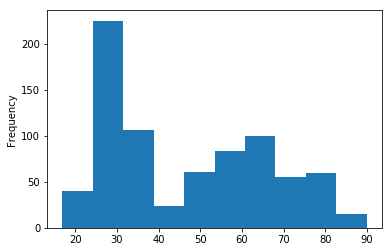

In [96]:
y.plot(kind='hist',bins=10) 

In [61]:
y.mean()

46.89496093749997

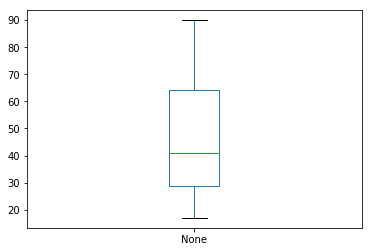

In [62]:
y.plot(kind='box')

In [63]:
y.median()

40.97

In [64]:
y.std()

19.48494701308614

In [65]:
y.min()

16.949999999999999

### Since mean and median are almost similar and there are no outliers, the bins can be taken as 0 to mean-

In [66]:
d=pd.DataFrame(y,columns=['y'])
d.loc[d['y']<=40,'y_category']='low'
d.loc[(d['y']>40) & (d['y'] < 65),'y_category'] = 'medium'
d.loc[d['y'] >= 65,'y_category'] ='high'

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,d,test_size=0.33,random_state=42)

In [68]:
d.head()

,y,y_category
0,36.88,low
1,36.88,low
2,36.88,low
3,36.88,low
4,49.12,medium


In [69]:
y_final_train=pd.get_dummies(data=y_train['y_category'])

In [70]:
y_final_train.head()

,high,low,medium
464,0,1,0
223,0,1,0
393,0,0,1
766,0,1,0
570,0,0,1


In [76]:
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)


In [90]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(8,activation='relu',input_dim=8))
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))

In [91]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
model.fit(X_train,y_final_train,epochs=1000,batch_size=32)

Epoch 1/1000
514/514 [==============================] - 0s 49us/step - loss: 0.2604 - acc: 0.8301
Epoch 2/1000
514/514 [==============================] - 0s 44us/step - loss: 0.2592 - acc: 0.8281
Epoch 3/1000
514/514 [==============================] - 0s 51us/step - loss: 0.2585 - acc: 0.8281
Epoch 4/1000
514/514 [==============================] - 0s 44us/step - loss: 0.2577 - acc: 0.8268
Epoch 5/1000
514/514 [==============================] - 0s 44us/step - loss: 0.2572 - acc: 0.8256
Epoch 6/1000
514/514 [==============================] - 0s 50us/step - loss: 0.2560 - acc: 0.8288
Epoch 7/1000
514/514 [==============================] - 0s 50us/step - loss: 0.2554 - acc: 0.8281
Epoch 8/1000
514/514 [==============================] - 0s 39us/step - loss: 0.2548 - acc: 0.8294
Epoch 9/1000
514/514 [==============================] - 0s 58us/step - loss: 0.2539 - acc: 0.8281
Epoch 10/1000
514/514 [==============================] - 0s 41us/step - loss: 0.2532 - acc: 0.8275
Epoch 11/1000
514/5

514/514 [==============================] - 0s 50us/step - loss: 0.2037 - acc: 0.9306
Epoch 84/1000
514/514 [==============================] - 0s 54us/step - loss: 0.2044 - acc: 0.9293
Epoch 85/1000
514/514 [==============================] - 0s 47us/step - loss: 0.2030 - acc: 0.9313
Epoch 86/1000
514/514 [==============================] - 0s 52us/step - loss: 0.2032 - acc: 0.9326
Epoch 87/1000
514/514 [==============================] - 0s 50us/step - loss: 0.2016 - acc: 0.9319
Epoch 88/1000
514/514 [==============================] - 0s 45us/step - loss: 0.2014 - acc: 0.9339
Epoch 89/1000
514/514 [==============================] - 0s 70us/step - loss: 0.2015 - acc: 0.9326
Epoch 90/1000
514/514 [==============================] - 0s 55us/step - loss: 0.2003 - acc: 0.9326
Epoch 91/1000
514/514 [==============================] - 0s 55us/step - loss: 0.2001 - acc: 0.9306
Epoch 92/1000
514/514 [==============================] - 0s 55us/step - loss: 0.1991 - acc: 0.9306
Epoch 93/1000
514/514 [=

514/514 [==============================] - 0s 43us/step - loss: 0.1721 - acc: 0.9397
Epoch 166/1000
514/514 [==============================] - 0s 44us/step - loss: 0.1719 - acc: 0.9364
Epoch 167/1000
514/514 [==============================] - 0s 52us/step - loss: 0.1720 - acc: 0.9384
Epoch 168/1000
514/514 [==============================] - 0s 44us/step - loss: 0.1711 - acc: 0.9377
Epoch 169/1000
514/514 [==============================] - 0s 57us/step - loss: 0.1719 - acc: 0.9390
Epoch 170/1000
514/514 [==============================] - 0s 40us/step - loss: 0.1720 - acc: 0.9364
Epoch 171/1000
514/514 [==============================] - 0s 53us/step - loss: 0.1701 - acc: 0.9390
Epoch 172/1000
514/514 [==============================] - 0s 55us/step - loss: 0.1699 - acc: 0.9384
Epoch 173/1000
514/514 [==============================] - 0s 56us/step - loss: 0.1693 - acc: 0.9397
Epoch 174/1000
514/514 [==============================] - 0s 43us/step - loss: 0.1691 - acc: 0.9403
Epoch 175/1000


514/514 [==============================] - 0s 55us/step - loss: 0.1364 - acc: 0.9656
Epoch 246/1000
514/514 [==============================] - 0s 49us/step - loss: 0.1359 - acc: 0.9656
Epoch 247/1000
514/514 [==============================] - 0s 52us/step - loss: 0.1358 - acc: 0.9656
Epoch 248/1000
514/514 [==============================] - 0s 48us/step - loss: 0.1371 - acc: 0.9656
Epoch 249/1000
514/514 [==============================] - 0s 60us/step - loss: 0.1367 - acc: 0.9656
Epoch 250/1000
514/514 [==============================] - 0s 50us/step - loss: 0.1350 - acc: 0.9663
Epoch 251/1000
514/514 [==============================] - 0s 58us/step - loss: 0.1345 - acc: 0.9656
Epoch 252/1000
514/514 [==============================] - 0s 50us/step - loss: 0.1339 - acc: 0.9656
Epoch 253/1000
514/514 [==============================] - 0s 47us/step - loss: 0.1339 - acc: 0.9656
Epoch 254/1000
514/514 [==============================] - 0s 61us/step - loss: 0.1335 - acc: 0.9656
Epoch 255/1000


514/514 [==============================] - 0s 52us/step - loss: 0.1161 - acc: 0.9663
Epoch 327/1000
514/514 [==============================] - 0s 52us/step - loss: 0.1160 - acc: 0.9650
Epoch 328/1000
514/514 [==============================] - 0s 50us/step - loss: 0.1160 - acc: 0.9656
Epoch 329/1000
514/514 [==============================] - 0s 44us/step - loss: 0.1158 - acc: 0.9650
Epoch 330/1000
514/514 [==============================] - 0s 52us/step - loss: 0.1155 - acc: 0.9663
Epoch 331/1000
514/514 [==============================] - 0s 51us/step - loss: 0.1149 - acc: 0.9656
Epoch 332/1000
514/514 [==============================] - 0s 47us/step - loss: 0.1153 - acc: 0.9656
Epoch 333/1000
514/514 [==============================] - 0s 62us/step - loss: 0.1154 - acc: 0.9650
Epoch 334/1000
514/514 [==============================] - 0s 56us/step - loss: 0.1149 - acc: 0.9650
Epoch 335/1000
514/514 [==============================] - 0s 57us/step - loss: 0.1147 - acc: 0.9656
Epoch 336/1000


514/514 [==============================] - 0s 49us/step - loss: 0.1042 - acc: 0.9676
Epoch 409/1000
514/514 [==============================] - 0s 54us/step - loss: 0.1035 - acc: 0.9682
Epoch 410/1000
514/514 [==============================] - 0s 51us/step - loss: 0.1030 - acc: 0.9689
Epoch 411/1000
514/514 [==============================] - 0s 49us/step - loss: 0.1030 - acc: 0.9695
Epoch 412/1000
514/514 [==============================] - 0s 50us/step - loss: 0.1028 - acc: 0.9695
Epoch 413/1000
514/514 [==============================] - 0s 53us/step - loss: 0.1025 - acc: 0.9702
Epoch 414/1000
514/514 [==============================] - 0s 48us/step - loss: 0.1035 - acc: 0.9689
Epoch 415/1000
514/514 [==============================] - 0s 56us/step - loss: 0.1080 - acc: 0.9663
Epoch 416/1000
514/514 [==============================] - 0s 55us/step - loss: 0.1038 - acc: 0.9689
Epoch 417/1000
514/514 [==============================] - 0s 49us/step - loss: 0.1022 - acc: 0.9695
Epoch 418/1000


514/514 [==============================] - 0s 45us/step - loss: 0.0969 - acc: 0.9702
Epoch 491/1000
514/514 [==============================] - 0s 42us/step - loss: 0.0969 - acc: 0.9702
Epoch 492/1000
514/514 [==============================] - 0s 41us/step - loss: 0.0968 - acc: 0.9702
Epoch 493/1000
514/514 [==============================] - 0s 53us/step - loss: 0.0973 - acc: 0.9702
Epoch 494/1000
514/514 [==============================] - 0s 67us/step - loss: 0.0979 - acc: 0.9682
Epoch 495/1000
514/514 [==============================] - 0s 56us/step - loss: 0.0966 - acc: 0.9695
Epoch 496/1000
514/514 [==============================] - 0s 48us/step - loss: 0.0971 - acc: 0.9695
Epoch 497/1000
514/514 [==============================] - 0s 51us/step - loss: 0.1000 - acc: 0.9702
Epoch 498/1000
514/514 [==============================] - 0s 58us/step - loss: 0.0977 - acc: 0.9702
Epoch 499/1000
514/514 [==============================] - 0s 44us/step - loss: 0.0971 - acc: 0.9695
Epoch 500/1000


514/514 [==============================] - 0s 49us/step - loss: 0.0936 - acc: 0.9695
Epoch 572/1000
514/514 [==============================] - 0s 60us/step - loss: 0.0940 - acc: 0.9702
Epoch 573/1000
514/514 [==============================] - 0s 42us/step - loss: 0.0937 - acc: 0.9695
Epoch 574/1000
514/514 [==============================] - 0s 50us/step - loss: 0.0936 - acc: 0.9695
Epoch 575/1000
514/514 [==============================] - 0s 53us/step - loss: 0.0936 - acc: 0.9695
Epoch 576/1000
514/514 [==============================] - 0s 46us/step - loss: 0.0934 - acc: 0.9695
Epoch 577/1000
514/514 [==============================] - 0s 47us/step - loss: 0.0939 - acc: 0.9702
Epoch 578/1000
514/514 [==============================] - 0s 48us/step - loss: 0.0938 - acc: 0.9695
Epoch 579/1000
514/514 [==============================] - 0s 49us/step - loss: 0.0935 - acc: 0.9695
Epoch 580/1000
514/514 [==============================] - 0s 49us/step - loss: 0.0935 - acc: 0.9695
Epoch 581/1000


514/514 [==============================] - 0s 54us/step - loss: 0.0915 - acc: 0.9695
Epoch 654/1000
514/514 [==============================] - 0s 43us/step - loss: 0.0915 - acc: 0.9695
Epoch 655/1000
514/514 [==============================] - 0s 45us/step - loss: 0.0919 - acc: 0.9708
Epoch 656/1000
514/514 [==============================] - 0s 44us/step - loss: 0.0913 - acc: 0.9708
Epoch 657/1000
514/514 [==============================] - 0s 47us/step - loss: 0.0914 - acc: 0.9695
Epoch 658/1000
514/514 [==============================] - 0s 50us/step - loss: 0.0915 - acc: 0.9702
Epoch 659/1000
514/514 [==============================] - 0s 60us/step - loss: 0.0914 - acc: 0.9708
Epoch 660/1000
514/514 [==============================] - 0s 53us/step - loss: 0.0915 - acc: 0.9702
Epoch 661/1000
514/514 [==============================] - 0s 60us/step - loss: 0.0914 - acc: 0.9702
Epoch 662/1000
514/514 [==============================] - 0s 59us/step - loss: 0.0914 - acc: 0.9702
Epoch 663/1000


514/514 [==============================] - 0s 46us/step - loss: 0.0901 - acc: 0.9708
Epoch 735/1000
514/514 [==============================] - 0s 46us/step - loss: 0.0900 - acc: 0.9708
Epoch 736/1000
514/514 [==============================] - 0s 53us/step - loss: 0.0901 - acc: 0.9702
Epoch 737/1000
514/514 [==============================] - 0s 41us/step - loss: 0.0901 - acc: 0.9695
Epoch 738/1000
514/514 [==============================] - 0s 59us/step - loss: 0.0900 - acc: 0.9702
Epoch 739/1000
514/514 [==============================] - 0s 58us/step - loss: 0.0901 - acc: 0.9721
Epoch 740/1000
514/514 [==============================] - 0s 55us/step - loss: 0.0900 - acc: 0.9715
Epoch 741/1000
514/514 [==============================] - 0s 53us/step - loss: 0.0901 - acc: 0.9708
Epoch 742/1000
514/514 [==============================] - 0s 72us/step - loss: 0.0903 - acc: 0.9708
Epoch 743/1000
514/514 [==============================] - 0s 63us/step - loss: 0.0898 - acc: 0.9708
Epoch 744/1000


514/514 [==============================] - 0s 47us/step - loss: 0.0903 - acc: 0.9715
Epoch 816/1000
514/514 [==============================] - 0s 52us/step - loss: 0.0897 - acc: 0.9721
Epoch 817/1000
514/514 [==============================] - 0s 42us/step - loss: 0.0897 - acc: 0.9715
Epoch 818/1000
514/514 [==============================] - 0s 44us/step - loss: 0.0893 - acc: 0.9721
Epoch 819/1000
514/514 [==============================] - 0s 48us/step - loss: 0.0893 - acc: 0.9715
Epoch 820/1000
514/514 [==============================] - 0s 58us/step - loss: 0.0892 - acc: 0.9715
Epoch 821/1000
514/514 [==============================] - 0s 47us/step - loss: 0.0891 - acc: 0.9721
Epoch 822/1000
514/514 [==============================] - 0s 59us/step - loss: 0.0890 - acc: 0.9715
Epoch 823/1000
514/514 [==============================] - 0s 45us/step - loss: 0.0890 - acc: 0.9721
Epoch 824/1000
514/514 [==============================] - 0s 57us/step - loss: 0.0892 - acc: 0.9702
Epoch 825/1000


514/514 [==============================] - 0s 56us/step - loss: 0.0890 - acc: 0.9702
Epoch 897/1000
514/514 [==============================] - 0s 61us/step - loss: 0.0884 - acc: 0.9708
Epoch 898/1000
514/514 [==============================] - 0s 54us/step - loss: 0.0879 - acc: 0.9715
Epoch 899/1000
514/514 [==============================] - 0s 45us/step - loss: 0.0880 - acc: 0.9708
Epoch 900/1000
514/514 [==============================] - 0s 57us/step - loss: 0.0881 - acc: 0.9721
Epoch 901/1000
514/514 [==============================] - 0s 65us/step - loss: 0.0881 - acc: 0.9715
Epoch 902/1000
514/514 [==============================] - 0s 70us/step - loss: 0.0959 - acc: 0.9676
Epoch 903/1000
514/514 [==============================] - 0s 54us/step - loss: 0.0934 - acc: 0.9695
Epoch 904/1000
514/514 [==============================] - 0s 54us/step - loss: 0.0895 - acc: 0.9708
Epoch 905/1000
514/514 [==============================] - 0s 54us/step - loss: 0.0896 - acc: 0.9695
Epoch 906/1000


514/514 [==============================] - 0s 45us/step - loss: 0.0878 - acc: 0.9708
Epoch 978/1000
514/514 [==============================] - 0s 51us/step - loss: 0.0880 - acc: 0.9708
Epoch 979/1000
514/514 [==============================] - 0s 56us/step - loss: 0.0876 - acc: 0.9715
Epoch 980/1000
514/514 [==============================] - 0s 51us/step - loss: 0.0876 - acc: 0.9715
Epoch 981/1000
514/514 [==============================] - 0s 57us/step - loss: 0.0877 - acc: 0.9715
Epoch 982/1000
514/514 [==============================] - 0s 57us/step - loss: 0.0876 - acc: 0.9715
Epoch 983/1000
514/514 [==============================] - 0s 51us/step - loss: 0.0880 - acc: 0.9708
Epoch 984/1000
514/514 [==============================] - 0s 52us/step - loss: 0.0876 - acc: 0.9715
Epoch 985/1000
514/514 [==============================] - 0s 50us/step - loss: 0.0877 - acc: 0.9715
Epoch 986/1000
514/514 [==============================] - 0s 66us/step - loss: 0.0874 - acc: 0.9715
Epoch 987/1000


In [83]:
X_test=sc.transform(X_test)


In [95]:
y_final_test=pd.get_dummies(data=y_test['y_category'])
scores = model.evaluate(X_test, y_final_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

254/254 [==============================] - 0s 233us/step

acc: 97.11%
